In [8]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [43]:
gpu_available = tf.config.list_physical_devices('GPU')
is_cuda_gpu_available = tf.test.is_gpu_available(cuda_only=True)
is_cuda_gpu_min_3 = tf.test.is_gpu_available(True, (3,0))
is_cuda_gpu_min_3

True

In [2]:
##get dataset from keras library
(x_train,y_train),(x_test,y_test)= keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 41s 4us/step


In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

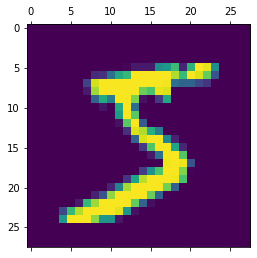

In [12]:
##show training image
plt.matshow(x_train[0])

In [15]:
## show real value
y_train[0]

5

In [18]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [19]:
x_train.shape

(60000, 28, 28)

In [44]:
#devide with 255 to make value from 0 to 1 "SCALLING"
x_train=x_train/255
x_test=x_test/255

In [45]:
##flatten image (matrix)
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)


In [46]:
x_train_flattened.shape

(60000, 784)

In [47]:
x_test_flattened.shape

(10000, 784)

In [48]:
x_train_flattened[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [49]:
## keras.sequential() means i have stack of layer in my neural network, Dense means every neuron connected to neuron on next layer
model=keras.Sequential([
    ##10 output layer, 784 input, with sigmoid activation function
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7180 - accuracy: 0.8123
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3096 - accuracy: 0.9130
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2858 - accuracy: 0.9190
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2688 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2711 - accuracy: 0.9236


In [50]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2654 - accuracy: 0.9254


[0.2654055655002594, 0.9254000186920166]

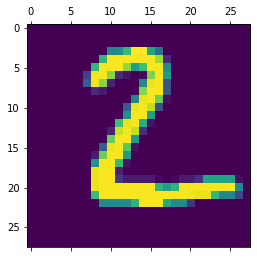

In [57]:
plt.matshow(x_test[1])

In [53]:
y_predicted = model.predict(x_test_flattened)

In [58]:
y_predicted[1]

array([3.4633777e-01, 3.8338872e-03, 9.9924552e-01, 2.4135351e-01,
       8.5271062e-10, 8.1659496e-01, 8.4755307e-01, 1.2334247e-12,
       1.1903720e-01, 2.0215765e-09], dtype=float32)

In [61]:
#make y preedicted real value ex:7 instead of matric
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [62]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [59]:
np.argmax(y_predicted[1])

2

In [63]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    1,    2,    1,    5,    8,    3,    1,    1],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   4,   10,  916,   16,   10,    6,   13,   11,   42,    4],
       [   4,    0,   18,  917,    0,   25,    3,   11,   20,   12],
       [   1,    1,    4,    1,  923,    0,    9,    3,    7,   33],
       [   9,    3,    2,   28,   11,  773,   18,    8,   32,    8],
       [  10,    3,    8,    1,    8,   13,  911,    2,    2,    0],
       [   1,    5,   22,    5,   10,    0,    0,  946,    2,   37],
       [   5,    9,    6,   16,    9,   25,    8,   11,  871,   14],
       [   9,    6,    2,   10,   30,    3,    0,   18,    7,  924]])>

In [64]:
import seaborn as sn

Text(69.0, 0.5, 'truth')

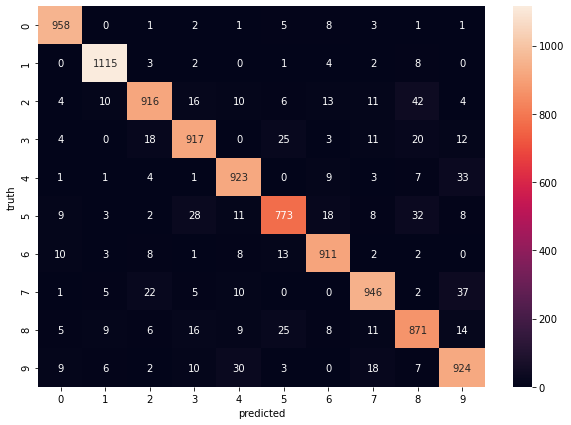

In [65]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("predicted")
plt.ylabel("truth")

In [67]:
## try to add hidden layer to improve performance
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
    
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4512 - accuracy: 0.8719
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1290 - accuracy: 0.9627
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0887 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0659 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0484 - accuracy: 0.9852


In [68]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0847 - accuracy: 0.9728


[0.08467742055654526, 0.9728000164031982]

Text(69.0, 0.5, 'truth')

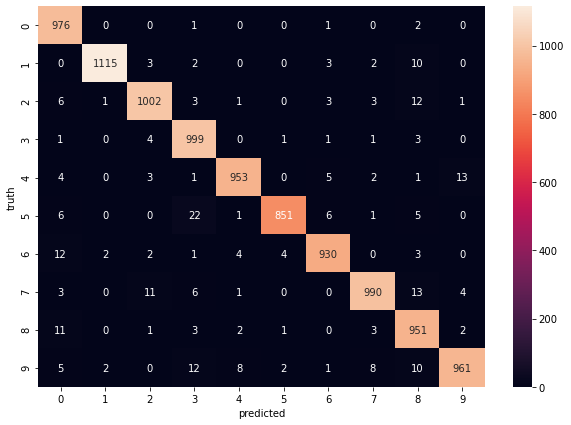

In [69]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("predicted")
plt.ylabel("truth")

In [74]:
## using keras flattended
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
    
])

model.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 20.5081 - accuracy: 0.1281A: 1s - los
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 20.1399 - accuracy: 0.1264
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 20.4284 - accuracy: 0.1069
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 20.2364 - accuracy: 0.1045
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 20.2757 - accuracy: 0.0986
